## PCA and it's implementation in python

### What is PCA ? 

* *According to wikipedia : "Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components."*


* Let's assume you want to predict the GDP for the United States for next year and for that you have lots of data from the current year and from the last 10 years. Your data have all the publicly available economic indicator like inflation rate, unemployment rate, literacy rate, growth and so on.... You've gather censes data for the current year, the stock prices data etc. In short you've so many variable to work with . 

![](images/data.png)

* Now the question that come deal with so many variables. Do we know the relationship between the variables. Do we know which variable/features contribute more in prediction and so on.


* If you don't know the answer you might cause your model to overfit( A very common problem in machine learning). 


* There are basically two approach to go forward one of them is feature elimination that involves removing some of the features from the feature space which it does reduce the data but also the model doesn't gain knowledge from the dropped features.


* The other approach is Feature Extraction, it involves creating new features from the combination of old features. Ultimately we keep the new features we want and remove the old features.

![](images/pca.png)


* PCA is a feature extraction method that reduces the dimension of the feature space by presenting it in 2 dimensions ultimately keeping the most important features that contributes maximum to the model.The features thus formed are known as principal components.


### Implementation in Python

In [14]:
# First we start by importing the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing 

#### Creating Random Data

In [15]:
# we create an array of 100 gene name like gene1, gen2 etc
genes = ['gene'+str(i) for i in range(1,101)]
# then we create two different types of gene samples
wt = ['wt'+str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]

In [16]:
# we create a dataframe to store the above created data having columns as gene samples and rows as gene types
data = pd.DataFrame(columns = [*wt,*ko],index=genes)

# This is where we are actually filling the random data as entries in the dataframe
for gene in data.index:
    # for each gene type in the index we create 5 random 'wt' values and 5 random 'ko' values. 
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam = rd.randrange(10,1000),size=5)
    # the comes from poisson distribution. For each gene type the mean varies from 10 to 1000
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam = rd.randrange(10,1000),size=5)

data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,92,103,97,94,95,300,315,323,300,329
gene2,143,155,161,167,162,177,173,178,174,162
gene3,548,588,553,549,584,212,272,229,258,255
gene4,80,82,62,79,65,160,194,180,198,190
gene5,217,240,222,212,211,785,773,728,789,752


In [17]:
# returns the dimension of dataset
data.shape

(100, 10)

#### Let's do PCA

In [18]:
# first let's center and scale the data. The data is require to have zero mean(centering) ans unit standard deviation(scaling)
scaled_data = preprocessing.scale(data.T)
# we then create PCA object.
pca = PCA()
# we call the fit method that does the PCA i.e calculating loading scores and the variation each principal component account for.
pca.fit(scaled_data)
# this method genrates the coordinates for PCA graph using the loading score and scaled data.
pca_data = pca.transform(scaled_data)

In [19]:
# we calculate the precentage of variation each principal component account for.
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
# here we genrate names as labels for each principal component
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]

#### Plotting the scree plot to find the principal components.

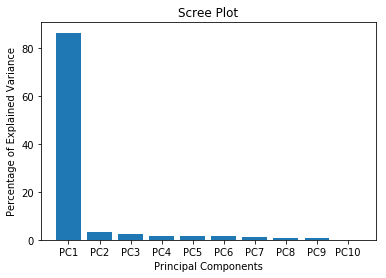

In [20]:
%matplotlib inline
plt.bar(x = range(1,len(per_var)+1), height = per_var,tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

* We can see PC1 describes almost all the variation in the dataset. So we can plot a 2D graph using PC1 and PC2 .

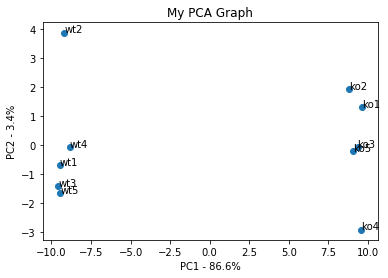

In [21]:
# to plot PCA graph we put new coordinates into a dataframe with rows as gene type and column as PC labels
pca_df = pd.DataFrame(pca_data, index = [*wt,*ko], columns = labels)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    # this loop adds sample data names to the graph
    plt.annotate(sample, (pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
    
plt.show()

* The ko sample clustered along each other suggests that they correlate to each other. The same goes for wt samples they clustered together.The separation between the clusters along the x axis shows that both the clusters are very different from each other.

#### Determining which gene in PC1 has the maximum influence in the separation between PC1 and PC2.

In [24]:
# first we calculate the laoding scores in PC1.
loading_scores = pd.Series(pca.components_[0],index=genes)
# then we sort the values in decreasing manner.
sorted_loading_scores  = loading_scores.abs().sort_values(ascending = False)
# we take the top 10 indexes i.e gene names
top_10_gene = sorted_loading_scores[:10].index.values
# lastly we print the gene name along with the loading scores.
loading_scores[top_10_gene]

gene85    0.107396
gene11    0.107385
gene61    0.107375
gene24    0.107369
gene51   -0.107364
gene25    0.107358
gene60   -0.107340
gene89   -0.107338
gene10   -0.107322
gene30   -0.107313
dtype: float64

* we can see lot of similar scores which means that a lot genes contributes to the separation of PC1 from PC2.